# TRAITEMENT DE DONNÉES

In [135]:
library(knitr)
## Global options
options(max.print="75")
opts_chunk$set(echo=TRUE,
	             cache=FALSE,
               prompt=FALSE,
               tidy=TRUE,
               comment=NA,
               message=FALSE,
               warning=TRUE)
opts_knit$set(width=75)
library(tidyverse)

## <FONT COLOR="Red"> Importation de données

In [136]:
visco_input<-read.csv("visco.csv")
data_visco = visco_input[,4:187]
head(data_visco)

,visco..dPa.s..à.1200.C..from.VFT.,X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,⋯,X__174,X__175,X__176,X__177,X__178,X__179,X__180,X__181,X__182,X__183
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2430,0,0.00,0,9.42,0,0,0,8.52,0,⋯,0,0,0,0,0,0,0,0,0,0
2,4433,0,0.00,0,9.42,0,0,0,8.53,0,⋯,0,0,0,0,0,0,0,0,0,0
3,25,0,0.39,0,3.58,0,0,0,14.25,0,⋯,0,0,0,0,0,0,0,0,0,0
4,17,0,0.00,0,3.33,0,0,0,14.84,0,⋯,0,0,0,0,0,0,0,0,0,0
5,21,0,0.00,0,3.81,0,0,0,14.08,0,⋯,0,0,0,0,0,0,0,0,0,0
6,64,0,0.00,0,0.00,0,0,0,0.00,0,⋯,0,0,0,0,0,0,0,0,0,0


### Remplacer le nom de la variable pour faciliter tous les calculs

In [137]:
data_visco %>% 
  rename(
    vis = visco..dPa.s..à.1200.C..from.VFT.
    )

vis,X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,⋯,X__174,X__175,X__176,X__177,X__178,X__179,X__180,X__181,X__182,X__183
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2430,0,0.00,0,9.42,0,0,0,8.52,0,⋯,0,0,0,0,0,0,0,0,0,0
4433,0,0.00,0,9.42,0,0,0,8.53,0,⋯,0,0,0,0,0,0,0,0,0,0
25,0,0.39,0,3.58,0,0,0,14.25,0,⋯,0,0,0,0,0,0,0,0,0,0
17,0,0.00,0,3.33,0,0,0,14.84,0,⋯,0,0,0,0,0,0,0,0,0,0
21,0,0.00,0,3.81,0,0,0,14.08,0,⋯,0,0,0,0,0,0,0,0,0,0
64,0,0.00,0,0.00,0,0,0,0.00,0,⋯,0,0,0,0,0,0,0,0,0,0
79,0,0.00,0,3.00,0,0,0,18.00,0,⋯,0,0,0,0,0,0,0,0,0,0
5864,0,0.00,0,9.43,0,0,0,8.53,0,⋯,0,0,0,0,0,0,0,0,0,0
946,0,0.00,0,0.00,0,0,0,0.00,0,⋯,0,0,0,0,0,0,0,0,0,0


In [138]:
names(data_visco)[1] = 'vis'
data_visco

vis,X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,⋯,X__174,X__175,X__176,X__177,X__178,X__179,X__180,X__181,X__182,X__183
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2430,0,0.00,0,9.42,0,0,0,8.52,0,⋯,0,0,0,0,0,0,0,0,0,0
4433,0,0.00,0,9.42,0,0,0,8.53,0,⋯,0,0,0,0,0,0,0,0,0,0
25,0,0.39,0,3.58,0,0,0,14.25,0,⋯,0,0,0,0,0,0,0,0,0,0
17,0,0.00,0,3.33,0,0,0,14.84,0,⋯,0,0,0,0,0,0,0,0,0,0
21,0,0.00,0,3.81,0,0,0,14.08,0,⋯,0,0,0,0,0,0,0,0,0,0
64,0,0.00,0,0.00,0,0,0,0.00,0,⋯,0,0,0,0,0,0,0,0,0,0
79,0,0.00,0,3.00,0,0,0,18.00,0,⋯,0,0,0,0,0,0,0,0,0,0
5864,0,0.00,0,9.43,0,0,0,8.53,0,⋯,0,0,0,0,0,0,0,0,0,0
946,0,0.00,0,0.00,0,0,0,0.00,0,⋯,0,0,0,0,0,0,0,0,0,0


## <FONT COLOR="Red"> Nettoyer les données

In [139]:
for (i in c(2:183)){
    if (is.null(data_visco[,i]))
        data_visco = data_visco[, -i]
}

> <FONT COLOR="Blue"> Le tableau **"data_vis"** sauvegarde la base de données contenant **116** variables non nulles

In [140]:
data_vis= subset(data_visco, select = c(colMeans(data_visco) !=0))

In [141]:
dim(data_vis)

[1] 7247  116

In [142]:
data_vis

,vis,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,⋯,X__125,X__127,X__128,X__130,X__131,X__132,X__133,X__135,X__136,X__138
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2430,0.00,0,9.42,0,0,0,8.52,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
2,4433,0.00,0,9.42,0,0,0,8.53,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
3,25,0.39,0,3.58,0,0,0,14.25,0,0,⋯,0,0,0,0,0,0,0,0,3.56,1.34
4,17,0.00,0,3.33,0,0,0,14.84,0,0,⋯,0,0,0,0,0,0,0,0,0.00,1.24
5,21,0.00,0,3.81,0,0,0,14.08,0,0,⋯,0,0,0,0,0,0,0,0,3.31,1.24
6,64,0.00,0,0.00,0,0,0,0.00,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
7,79,0.00,0,3.00,0,0,0,18.00,0,0,⋯,0,0,0,0,0,0,0,0,1.00,2.00
8,5864,0.00,0,9.43,0,0,0,8.53,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00
9,946,0.00,0,0.00,0,0,0,0.00,0,0,⋯,0,0,0,0,0,0,0,0,0.00,0.00


In [143]:
#write.csv(data_vis,"/home/cthle/4GMM/Projet 4A/data_visco.csv", row.names = FALSE)

In [144]:
dv = data_visco[,c(1,72,45,37,71,23,69,110,40,74,77,49)]
autres = 100-c(rowSums(dv[c(-1)]))
dv = cbind(dv,autres)

> <FONT COLOR="Blue"> Le tableau **"dv"** sauvegarde la base de données contenant les variables sélectionnées par modèle linéaire

In [145]:
dv
dim(dv)

vis,X__71,X__44,X__36,X__70,X__22,X__68,X__109,X__39,X__73,X__76,X__48,autres
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2430,0,0,0.00,0.00,0,0,68.39,0.00,0,0.00,0,31.61
4433,0,0,0.00,0.00,0,0,70.32,0.00,0,0.00,0,29.68
25,0,0,0.08,0.00,0,0,45.42,9.22,0,1.41,0,43.87
17,0,0,0.00,0.00,0,0,46.16,9.91,0,1.26,0,42.67
21,0,0,2.36,0.00,0,0,45.55,9.28,0,1.25,0,41.56
64,0,0,0.00,0.00,0,0,66.51,0.00,0,0.00,0,33.49
79,0,0,0.00,0.00,0,0,56.00,3.00,0,2.00,0,39.00
5864,0,0,0.00,0.00,0,0,71.50,0.00,0,0.00,0,28.50
946,0,0,0.00,0.00,0,0,74.85,0.00,0,0.00,0,25.15


[1] 7247   13

##  <FONT COLOR="red"> Réduction de dimension

### <FONT COLOR="blue">  En utilisant Lasso

In [147]:
#telecharger la librairie necessaire pour Lasso
library(glmnet)

   [[ suppressing 33 column names ‘s0’, ‘s1’, ‘s2’ ... ]]

   [[ suppressing 33 column names ‘s0’, ‘s1’, ‘s2’ ... ]]

   [[ suppressing 33 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



116 x 77 sparse Matrix of class "dgCMatrix"
                                                                                  
(Intercept) 7.215182 6.454889 5.762139 5.130931 4.555797 3.721963 2.96206 2.312149
X__2        .        .        .        .        .        .        .       .       
                                                                                 
(Intercept) 1.720057 1.180565 0.6903021 0.2671036 -0.1184452 -0.469743 -0.7898325
X__2        .        .        .         .          .          .         .        
                                                                                
(Intercept) -1.081486 -1.268528 -1.40075 -1.492709 -1.576626 -1.653019 -1.723059
X__2         .         .         .        .         .         .         .       
                                                                                 
(Intercept) -1.784233 -1.865401 -1.957919 -2.044694 -2.155604 -2.257051 -2.304966
X__2         .         .         .         .         .

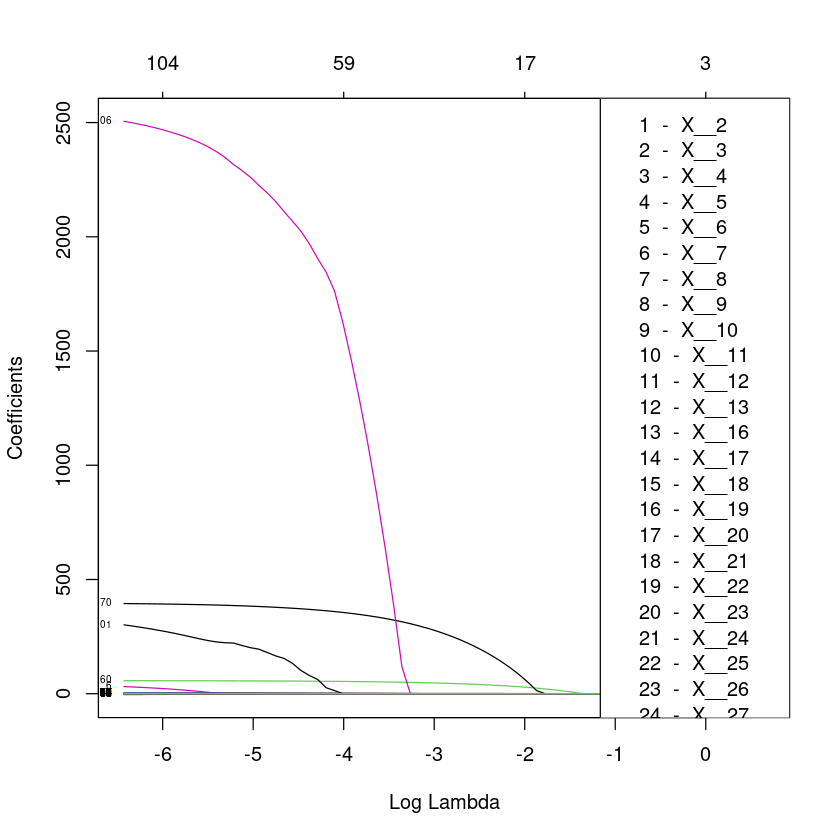

In [148]:
#Construire le modele de Lasso

reg.lasso <- glmnet(y = log(data_vis$vis),
                           x = as.matrix(data_vis[, -c(1)]))

coef(reg.lasso)

plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",paste(1:ncol(as.matrix(data_vis[, -c(1)])), " - ", colnames(as.matrix(data_vis[, -c(1)]))))


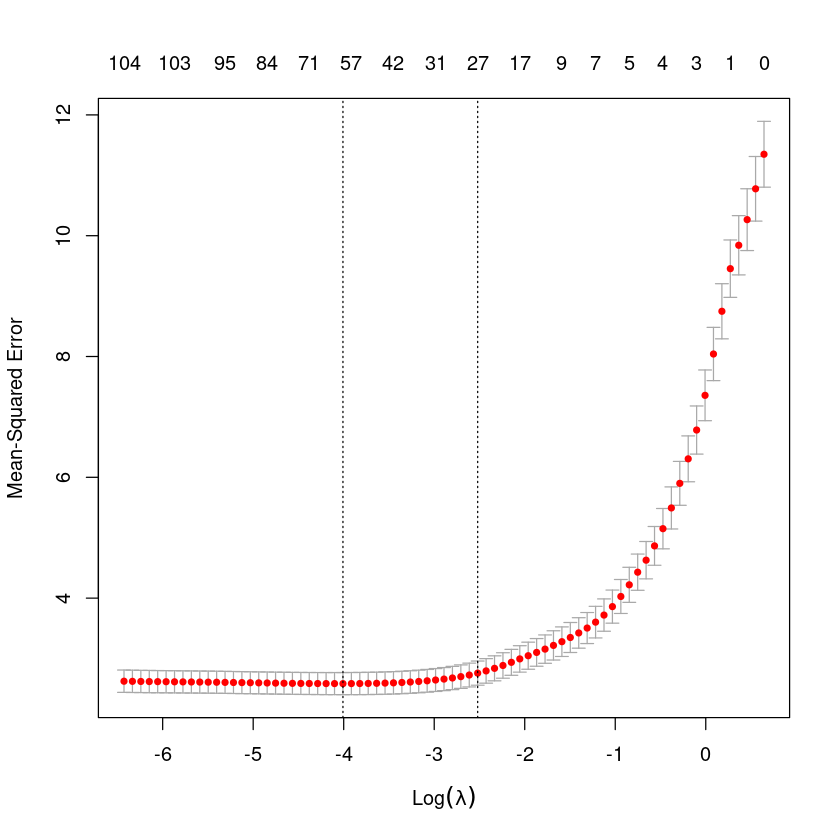

In [149]:
#utiliser cross-validation pour identifier la meilleure valeur lambda du modele LASSO 

reg.lasso.cv <- cv.glmnet(y = log(data_vis$vis), x = as.matrix(data_vis[, -c(1)]))
plot(reg.lasso.cv)

In [150]:


# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 1))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

[1] "CV estimate of lambda : 0.1"

116 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) -2.244491741
X__2         .          
X__3         0.212068988
X__4         0.176916204
X__5         .          
X__6         .          
X__7         .          
X__8        -0.020018122
X__9         .          
X__10        0.006224129
X__11        .          
X__12        .          
X__13        .          
X__16        .          
X__17       -0.002116120
X__18       -0.065988994
X__19        .          
X__20        .          
X__21        .          
X__22        .          
X__23        .          
X__24        .          
X__25        .          
X__26        .          
X__27        .          
X__29        0.092052013
X__30        0.023759092
X__31        .          
X__32        .          
X__33        .          
X__34        .          
X__35        .          
X__36        .          
X__37        .          
X__38        .          
X__39        .          
X__40        .          
X__43  

In [199]:
var_idx <- which((coef(reg.lasso.cv, s = "lambda.1se") !=0))
vis = data_vis$vis
dataLasso = data_vis[,var_idx,drop=FALSE]
#data_lasso = cbind(vis, data_vis[,var_idx,drop=FALSE])
#data_lasso
#lm.reduced = lm(vis~., data=data_lasso)
#summary(lm.reduced)
autres = 100-c(rowSums(dataLasso[c(-1)]))
dataLasso = cbind(dataLasso,autres)
dataLasso

,vis,X__3,X__4,X__8,X__10,X__17,X__18,X__29,X__30,X__43,⋯,X__84,X__86,X__106,X__109,X__113,X__115,X__117,X__133,X__138,autres
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2430,0,9.42,8.52,0,0,0.00,0.00,0,0,⋯,0,0,0,68.39,0,0.00,0,0,0.00,0.00000
2,4433,0,9.42,8.53,0,0,0.00,0.00,0,0,⋯,0,0,0,70.32,0,0.00,0,0,0.00,0.00000
3,25,0,3.58,14.25,0,0,1.88,0.00,0,0,⋯,0,0,0,45.42,0,0.00,0,0,1.34,16.60000
4,17,0,3.33,14.84,0,0,3.51,0.16,0,0,⋯,0,0,0,46.16,0,0.31,0,0,1.24,14.81000
5,21,0,3.81,14.08,0,0,3.30,0.09,0,0,⋯,0,0,0,45.55,0,0.08,0,0,1.24,16.88000
6,64,0,0.00,0.00,0,0,0.00,0.00,0,0,⋯,0,0,0,66.51,0,0.00,0,0,0.00,0.01000
7,79,0,3.00,18.00,0,0,2.00,0.00,0,0,⋯,0,0,0,56.00,0,0.00,0,0,2.00,6.00000
8,5864,0,9.43,8.53,0,0,0.00,0.00,0,0,⋯,0,0,0,71.50,0,0.00,0,0,0.00,0.00000
9,946,0,0.00,0.00,0,0,10.60,0.00,0,0,⋯,0,0,0,74.85,0,0.00,0,0,0.00,0.15000


In [198]:
write.csv(dataLasso,"/home/cthle/4GMM/Projet 4A/data_lasso.csv", row.names = FALSE)

### <FONT COLOR="blue">  En utilisant Stepwise

In [154]:
library(MASS)
# Fit the full model 
full.model <- lm(log(vis) ~., data = data_vis)
# Stepwise regression model
step.model <- step(full.model, direction = "both", 
                      trace = FALSE, k =log(20))


In [155]:
step.model
summary(step.model)


Call:
lm(formula = log(vis) ~ X__2 + X__3 + X__4 + X__5 + X__8 + X__10 + 
    X__11 + X__12 + X__16 + X__17 + X__18 + X__19 + X__20 + X__21 + 
    X__22 + X__23 + X__26 + X__29 + X__30 + X__31 + X__32 + X__34 + 
    X__36 + X__39 + X__43 + X__44 + X__46 + X__47 + X__48 + X__49 + 
    X__50 + X__53 + X__55 + X__56 + X__57 + X__58 + X__64 + X__65 + 
    X__67 + X__68 + X__70 + X__71 + X__72 + X__73 + X__74 + X__75 + 
    X__76 + X__81 + X__84 + X__86 + X__87 + X__88 + X__92 + X__93 + 
    X__98 + X__100 + X__101 + X__106 + X__109 + X__111 + X__113 + 
    X__115 + X__117 + X__118 + X__119 + X__121 + X__122 + X__125 + 
    X__127 + X__128 + X__130 + X__133 + X__136 + X__138, data = data_vis)

Coefficients:
(Intercept)         X__2         X__3         X__4         X__5         X__8  
   -45.8423       2.2052       1.1038       0.6242       0.3247       0.3758  
      X__10        X__11        X__12        X__16        X__17        X__18  
     0.4468       0.5891       0.4064       0.5335


Call:
lm(formula = log(vis) ~ X__2 + X__3 + X__4 + X__5 + X__8 + X__10 + 
    X__11 + X__12 + X__16 + X__17 + X__18 + X__19 + X__20 + X__21 + 
    X__22 + X__23 + X__26 + X__29 + X__30 + X__31 + X__32 + X__34 + 
    X__36 + X__39 + X__43 + X__44 + X__46 + X__47 + X__48 + X__49 + 
    X__50 + X__53 + X__55 + X__56 + X__57 + X__58 + X__64 + X__65 + 
    X__67 + X__68 + X__70 + X__71 + X__72 + X__73 + X__74 + X__75 + 
    X__76 + X__81 + X__84 + X__86 + X__87 + X__88 + X__92 + X__93 + 
    X__98 + X__100 + X__101 + X__106 + X__109 + X__111 + X__113 + 
    X__115 + X__117 + X__118 + X__119 + X__121 + X__122 + X__125 + 
    X__127 + X__128 + X__130 + X__133 + X__136 + X__138, data = data_vis)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9893 -0.7376 -0.1087  0.4612 15.3803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.584e+01  9.545e-01 -48.028  < 2e-16 ***
X__2         2.205e+00  1.023e+00   2.155 0.031182 *  
X__3         1.104e+00  2.18

In [179]:
library("leaps")
select.lin.reg <- regsubsets(data$vis ~., data=data_vis, nvmax=30, method="forward", really.big = TRUE)
res.slr = summary(select.lin.reg)

In [180]:
res.slr

Subset selection object
Call: regsubsets.formula(data$vis ~ ., data = data_vis, nvmax = 30, 
    method = "forward", really.big = TRUE)
115 Variables  (and intercept)
       Forced in Forced out
X__2       FALSE      FALSE
X__3       FALSE      FALSE
X__4       FALSE      FALSE
X__5       FALSE      FALSE
X__6       FALSE      FALSE
X__7       FALSE      FALSE
X__8       FALSE      FALSE
X__9       FALSE      FALSE
X__10      FALSE      FALSE
X__11      FALSE      FALSE
X__12      FALSE      FALSE
X__13      FALSE      FALSE
X__16      FALSE      FALSE
X__17      FALSE      FALSE
X__18      FALSE      FALSE
X__19      FALSE      FALSE
X__20      FALSE      FALSE
X__21      FALSE      FALSE
X__22      FALSE      FALSE
X__23      FALSE      FALSE
X__24      FALSE      FALSE
X__25      FALSE      FALSE
X__26      FALSE      FALSE
X__27      FALSE      FALSE
X__29      FALSE      FALSE
X__30      FALSE      FALSE
X__31      FALSE      FALSE
X__32      FALSE      FALSE
X__33      FALSE     

In [181]:
str(data.frame(AdjR2 = which.max(res.slr$adjr2), Cp = which.min(res.slr$cp), BIC = which.min(res.slr$bic) ))

'data.frame':	1 obs. of  3 variables:
 $ AdjR2: int 20
 $ Cp   : int 18
 $ BIC  : int 6


In [182]:
df = as.data.frame(res.slr$which)

In [190]:
df['cp'] = res.slr$cp

In [191]:
res.slr$cp

[1] 185.9841728  50.5516328  14.5810758   0.7364945 -12.4500136 -25.0332860
 [7] -31.4975254 -37.3319949 -41.6875504 -46.9019387 -50.6100854 -52.6434571
[13] -54.8274274 -55.7021634 -56.0486143 -56.0571856 -56.1251406 -56.2581100
[19] -55.9116531 -55.2181373 -54.0656725 -52.9494885 -51.7810666 -50.5200258
[25] -49.1784896 -47.8925412 -46.4469860 -44.9620544 -43.5850686 -42.0764817

In [192]:
index = which.min(res.slr$cp)

In [194]:
best_model = df %>% filter(cp == min(res.slr$cp))

In [195]:
as.logical(best_model)

[1]  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[13] FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[37] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE
[49] FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[61]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE
 [ reached getOption("max.print") -- omitted 43 entries ]

In [196]:
names(best_model[as.logical(best_model)])

[1] "(Intercept)" "X__4"        "X__5"        "X__8"        "X__17"      
 [6] "X__18"       "X__36"       "X__39"       "X__48"       "X__53"      
[11] "X__59"       "X__64"       "X__70"       "X__71"       "X__74"      
[16] "X__96"       "X__109"      "X__113"      "X__117"      "adjr2"      
[21] "cp"

In [204]:
data_AIC = data_visco[,c(1,5,6,9,18,19,37,40,49,54,60,65,71,72,75,97,110,114,118)]
autres = 100-c(rowSums(data_AIC[c(-1)]))
data_AIC = cbind(data_AIC,autres)
data_AIC

vis,X__4,X__5,X__8,X__17,X__18,X__36,X__39,X__48,X__53,X__59,X__64,X__70,X__71,X__74,X__96,X__109,X__113,X__117,autres
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2430,9.42,0,8.52,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,13.67,0,68.39,0,0,0.00
4433,9.42,0,8.53,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,11.73,0,70.32,0,0,0.00
25,3.58,0,14.25,0,1.88,0.08,9.22,0,0.08,1.78,2.29,0.00,0,12.78,0,45.42,0,0,8.64
17,3.33,0,14.84,0,3.51,0.00,9.91,0,0.00,2.47,0.04,0.00,0,13.13,0,46.16,0,0,6.61
21,3.81,0,14.08,0,3.30,2.36,9.28,0,0.00,1.66,0.00,0.00,0,13.31,0,45.55,0,0,6.65
64,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,33.48,0,66.51,0,0,0.01
79,3.00,0,18.00,0,2.00,0.00,3.00,0,0.00,2.00,0.00,0.00,0,11.00,0,56.00,0,0,5.00
5864,9.43,0,8.53,0,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0,10.54,0,71.50,0,0,0.00
946,0.00,0,0.00,0,10.60,0.00,0.00,0,0.00,0.00,0.00,0.00,0,14.40,0,74.85,0,0,0.15


In [205]:
write.csv(data_AIC,"/home/cthle/4GMM/Projet 4A/data_AIC.csv", row.names = FALSE)